## 範例重點
### 學習在模型開始前檢查各個環節
1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

In [1]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

Mon Sep  2 15:06:49 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.130                Driver Version: 384.130                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:01:00.0  On |                  N/A |
| 16%   45C    P8    16W / 200W |    726MiB /  8110MiB |     13%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 226us/step - loss: 1.9251 - acc: 0.3080 - val_loss: 1.7588 - val_acc: 0.3721
Epoch 2/100
50000/50000 [==============================] - 11s 213us/step - loss: 1.7008 - acc: 0.3927 - val_loss: 1.6815 - val_acc: 0.3947
Epoch 3/100
50000/50000 [==============================] - 11s 211us/step - loss: 1.6189 - acc: 0.4239 - val_loss: 1.6777 - val_acc: 0.4063
Epoch 4/100
50000/50000 [==============================] - 11s 229us/step - loss: 1.5508 - acc: 0.4483 - val_loss: 1.5426 - val_acc: 0.4508
Epoch 5/100
50000/50000 [==============================] - 11s 227us/step - loss: 1.5099 - acc: 0.4604 - val_loss: 1.5061 - val_acc: 0.4681
Epoch 6/100
50000/50000 [==============================] - 12s 230us/step - loss: 1.4722 - acc: 0.4768 - val_loss: 1.4802 - val_acc: 0.4756
Epoch 7/100
500

Epoch 55/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.5695 - acc: 0.7975 - val_loss: 1.9941 - val_acc: 0.5178
Epoch 56/100
50000/50000 [==============================] - 10s 194us/step - loss: 0.5503 - acc: 0.8051 - val_loss: 2.0369 - val_acc: 0.5056
Epoch 57/100
50000/50000 [==============================] - 9s 175us/step - loss: 0.5538 - acc: 0.7995 - val_loss: 2.1232 - val_acc: 0.5027
Epoch 58/100
50000/50000 [==============================] - 11s 214us/step - loss: 0.5375 - acc: 0.8079 - val_loss: 2.0471 - val_acc: 0.5031
Epoch 59/100
50000/50000 [==============================] - 10s 207us/step - loss: 0.5309 - acc: 0.8082 - val_loss: 2.0477 - val_acc: 0.5135
Epoch 60/100
50000/50000 [==============================] - 10s 209us/step - loss: 0.5103 - acc: 0.8160 - val_loss: 2.1207 - val_acc: 0.5121
Epoch 61/100
50000/50000 [==============================] - 10s 205us/step - loss: 0.4955 - acc: 0.8232 - val_loss: 2.1438 - val_acc: 0.5129
Epoch 62/100
5

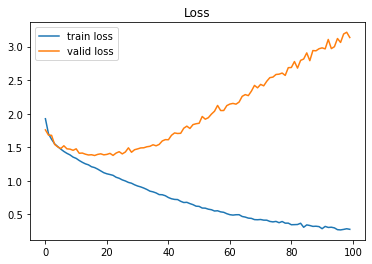

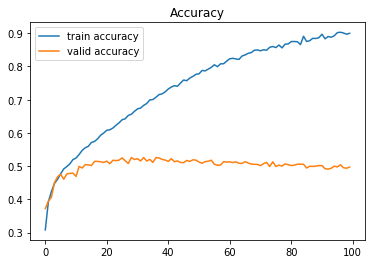

In [12]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [13]:
## 資料前處理
def preproc_x_new(x, flatten=True):
    x = ((x / 255)-0.5)*2.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

In [14]:
def build_mlp_deep(input_shape, output_units=10, num_neurons=[2048,1024,256,128,32,16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x_new(x_train)
x_test = preproc_x_new(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
model2 = build_mlp_deep(input_shape=x_train.shape[1:])
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               262400    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                4128      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528 

In [17]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [18]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [21]:
model2.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 43s 867us/step - loss: 1.8380 - acc: 0.3476 - val_loss: 1.6196 - val_acc: 0.4217
Epoch 2/100
50000/50000 [==============================] - 41s 811us/step - loss: 1.5371 - acc: 0.4581 - val_loss: 1.4829 - val_acc: 0.4804
Epoch 3/100
50000/50000 [==============================] - 38s 758us/step - loss: 1.4015 - acc: 0.5084 - val_loss: 1.4348 - val_acc: 0.5039
Epoch 4/100
50000/50000 [==============================] - 40s 794us/step - loss: 1.2953 - acc: 0.5446 - val_loss: 1.3794 - val_acc: 0.5191
Epoch 5/100
50000/50000 [==============================] - 40s 800us/step - loss: 1.1937 - acc: 0.5793 - val_loss: 1.3840 - val_acc: 0.5222
Epoch 6/100
50000/50000 [==============================] - 40s 796us/step - loss: 1.1078 - acc: 0.6102 - val_loss: 1.3816 - val_acc: 0.5273
Epoch 7/100
50000/50000 [==============================] - 37s 745us/step - loss: 1.0177 - acc: 0.6421 - val_l

Epoch 59/100
50000/50000 [==============================] - 39s 773us/step - loss: 0.0610 - acc: 0.9807 - val_loss: 3.4277 - val_acc: 0.5558
Epoch 60/100
50000/50000 [==============================] - 39s 788us/step - loss: 0.0827 - acc: 0.9740 - val_loss: 3.3812 - val_acc: 0.5433
Epoch 61/100
50000/50000 [==============================] - 39s 788us/step - loss: 0.0838 - acc: 0.9736 - val_loss: 3.3692 - val_acc: 0.5514
Epoch 62/100
50000/50000 [==============================] - 40s 791us/step - loss: 0.0604 - acc: 0.9809 - val_loss: 3.4017 - val_acc: 0.5410
Epoch 63/100
50000/50000 [==============================] - 37s 737us/step - loss: 0.0560 - acc: 0.9827 - val_loss: 3.4592 - val_acc: 0.5491
Epoch 64/100
50000/50000 [==============================] - 40s 794us/step - loss: 0.0595 - acc: 0.9817 - val_loss: 3.5906 - val_acc: 0.5405
Epoch 65/100
50000/50000 [==============================] - 39s 784us/step - loss: 0.0763 - acc: 0.9760 - val_loss: 3.4151 - val_acc: 0.5496
Epoch 66/100


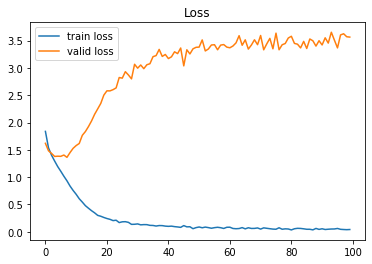

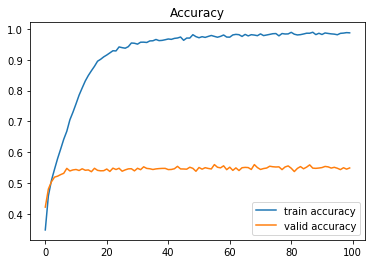

In [22]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss2 = model2.history.history["loss"]
valid_loss2 = model2.history.history["val_loss"]

train_acc2 = model2.history.history["acc"]
valid_acc2 = model2.history.history["val_acc"]

plt.plot(range(len(train_loss2)), train_loss2, label="train loss")
plt.plot(range(len(valid_loss2)), valid_loss2, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc2)), train_acc2, label="train accuracy")
plt.plot(range(len(valid_acc2)), valid_acc2, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [23]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


In [24]:
model3 = build_mlp_deep(input_shape=x_train.shape[1:])
model3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               262400    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                4128      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528 

In [25]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [26]:
model3.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 43s 860us/step - loss: 1.8907 - acc: 0.3192 - val_loss: 1.6716 - val_acc: 0.4045
Epoch 2/100
50000/50000 [==============================] - 38s 768us/step - loss: 1.5950 - acc: 0.4371 - val_loss: 1.5450 - val_acc: 0.4684
Epoch 3/100
50000/50000 [==============================] - 41s 824us/step - loss: 1.4497 - acc: 0.4902 - val_loss: 1.4378 - val_acc: 0.5000
Epoch 4/100
50000/50000 [==============================] - 43s 851us/step - loss: 1.3434 - acc: 0.5294 - val_loss: 1.4396 - val_acc: 0.5011
Epoch 5/100
50000/50000 [==============================] - 43s 853us/step - loss: 1.2493 - acc: 0.5601 - val_loss: 1.4218 - val_acc: 0.5162
Epoch 6/100
50000/50000 [==============================] - 40s 800us/step - loss: 1.1488 - acc: 0.5967 - val_loss: 1.3727 - val_acc: 0.5289
Epoch 7/100
50000/50000 [==============================] - 38s 753us/step - loss: 1.0669 - acc: 0.6279 - val_l

Epoch 59/100
50000/50000 [==============================] - 24s 482us/step - loss: 0.0729 - acc: 0.9778 - val_loss: 3.4374 - val_acc: 0.5382
Epoch 60/100
50000/50000 [==============================] - 24s 482us/step - loss: 0.0768 - acc: 0.9763 - val_loss: 3.3574 - val_acc: 0.5499
Epoch 61/100
50000/50000 [==============================] - 24s 470us/step - loss: 0.0724 - acc: 0.9771 - val_loss: 3.3956 - val_acc: 0.5360
Epoch 62/100
50000/50000 [==============================] - 23s 469us/step - loss: 0.0675 - acc: 0.9783 - val_loss: 3.4920 - val_acc: 0.5476
Epoch 63/100
50000/50000 [==============================] - 23s 468us/step - loss: 0.0550 - acc: 0.9829 - val_loss: 3.6059 - val_acc: 0.5482
Epoch 64/100
50000/50000 [==============================] - 23s 469us/step - loss: 0.0581 - acc: 0.9823 - val_loss: 3.5936 - val_acc: 0.5481
Epoch 65/100
50000/50000 [==============================] - 23s 468us/step - loss: 0.0757 - acc: 0.9766 - val_loss: 3.4556 - val_acc: 0.5454
Epoch 66/100


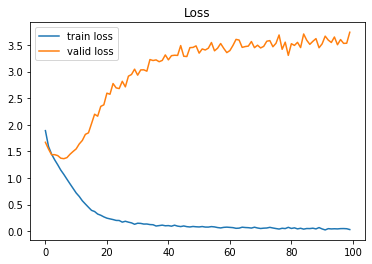

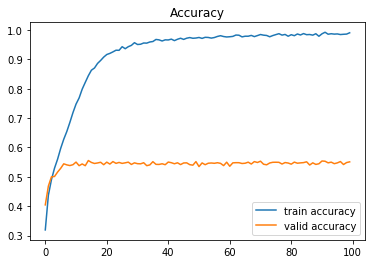

In [27]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss3 = model3.history.history["loss"]
valid_loss3 = model3.history.history["val_loss"]

train_acc3 = model3.history.history["acc"]
valid_acc3 = model3.history.history["val_acc"]

plt.plot(range(len(train_loss3)), train_loss3, label="train loss")
plt.plot(range(len(valid_loss3)), valid_loss3, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc3)), train_acc3, label="train accuracy")
plt.plot(range(len(valid_acc3)), valid_acc3, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()